In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
employee_survey = pd.read_csv(r"C:\Users\DELL\Documents\hr_analytics\employee_survey_data.csv")
manager_survey = pd.read_csv(r"C:\Users\DELL\Documents\hr_analytics\manager_survey_data.csv")
general_data = pd.read_csv(r"C:\Users\DELL\Documents\hr_analytics\general_data.csv")

In [4]:
print(employee_survey.columns)
print(manager_survey.columns)
print(general_data.columns)

Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance'],
      dtype='object')
Index(['EmployeeID', 'JobInvolvement', 'PerformanceRating'], dtype='object')
Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [5]:
from functools import reduce
df_list = [employee_survey, manager_survey, general_data]
emp_df = reduce(lambda left,right: pd.merge(left,right,how='inner',on='EmployeeID'), df_list)
emp_df.columns

Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'Age',
       'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
print(emp_df.shape)
emp_df.info()

(4410, 29)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
 4   JobInvolvement           4410 non-null   int64  
 5   PerformanceRating        4410 non-null   int64  
 6   Age                      4410 non-null   int64  
 7   Attrition                4410 non-null   object 
 8   BusinessTravel           4410 non-null   object 
 9   Department               4410 non-null   object 
 10  DistanceFromHome         4410 non-null   int64  
 11  Education                4410 non-null   int64  
 12  EducationField           4410 non-null   object 
 13  EmployeeCount            4410 non-null   int64  
 14  Gender       

In [7]:
emp_df.describe()

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  \
count  4410.000000              4385.000000      4390.000000      4372.000000   
mean   2205.500000                 2.723603         2.728246         2.761436   
std    1273.201673                 1.092756         1.101253         0.706245   
min       1.000000                 1.000000         1.000000         1.000000   
25%    1103.250000                 2.000000         2.000000         2.000000   
50%    2205.500000                 3.000000         3.000000         3.000000   
75%    3307.750000                 4.000000         4.000000         3.000000   
max    4410.000000                 4.000000         4.000000         4.000000   

       JobInvolvement  PerformanceRating          Age  DistanceFromHome  \
count     4410.000000        4410.000000  4410.000000       4410.000000   
mean         2.729932           3.153741    36.923810          9.192517   
std          0.711400           0.360742     9.133301          8.105026   
min          1.000000           3.000000    18.000000          1.000000   
25%          2.000000           3.000000    30.000000          2.000000   
50%          3.000000           3.000000    36.000000          7.000000   
75%          3.000000           3.000000    43.000000         14.000000   
max          4.000000           4.000000    60.000000         29.000000   

         Education  EmployeeCount  ...  MonthlyIncome  NumCompaniesWorked  \
count  4410.000000         4410.0  ...    4410.000000         4391.000000   
mean      2.912925            1.0  ...   65029.312925            2.694830   
std       1.023933            0.0  ...   47068.888559            2.498887   
min       1.000000            1.0  ...   10090.000000            0.000000   
25%       2.000000            1.0  ...   29110.000000            1.000000   
50%       3.000000            1.0  ...   49190.000000            2.000000   
75%       4.000000            1.0  ...   83800.000000            4.000000   
max       5.000000            1.0  ...  199990.000000            9.000000   

       PercentSalaryHike  StandardHours  StockOptionLevel  TotalWorkingYears  \
count        4410.000000         4410.0       4410.000000        4401.000000   
mean           15.209524            8.0          0.793878          11.279936   
std             3.659108            0.0          0.851883           7.782222   
min            11.000000            8.0          0.000000           0.000000   
25%            12.000000            8.0          0.000000           6.000000   
50%            14.000000            8.0          1.000000          10.000000   
75%            18.000000            8.0          1.000000          15.000000   
max            25.000000            8.0          3.000000          40.000000   

       TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
count            4410.000000     4410.000000              4410.000000   
mean                2.799320        7.008163                 2.187755   
std                 1.288978        6.125135                 3.221699   
min                 0.000000        0.000000                 0.000000   
25%                 2.000000        3.000000                 0.000000   
50%                 3.000000        5.000000                 1.000000   
75%                 3.000000        9.000000                 3.000000   
max                 6.000000       40.000000                15.000000   

       YearsWithCurrManager  
count           4410.000000  
mean               4.123129  
std                3.567327  
min                0.000000  
25%                2.000000  
50%                3.000000  
75%                7.000000  
max               17.000000  

[8 rows x 21 columns]

In [8]:
print(emp_df['Over18'].unique())
print(emp_df['EmployeeCount'].unique())
print(emp_df['StandardHours'].unique())

['Y']
[1]
[8]


In [9]:
# This function takes the dataframe and list of features to be dropped
# returns the updated dataframe

def drop_features(df, feat_list):
    for col in feat_list:
        if col in df.columns:
            df.drop(col, axis=1, inplace=True)
            print(f"{col} is dropped")
        else:
            print(f"{col} is already dropped")
            
drop_features(emp_df, ['EmployeeID', 'EmployeeCount', 'Over18', 'StandardHours'])

EmployeeID is dropped
EmployeeCount is dropped
Over18 is dropped
StandardHours is dropped


In [10]:
emp_df.head()

EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  JobInvolvement  \
0                      3.0              4.0              2.0               3   
1                      3.0              2.0              4.0               2   
2                      2.0              2.0              1.0               3   
3                      4.0              4.0              3.0               2   
4                      4.0              1.0              3.0               3   

   PerformanceRating  Age Attrition     BusinessTravel  \
0                  3   51        No      Travel_Rarely   
1                  4   31       Yes  Travel_Frequently   
2                  3   32        No  Travel_Frequently   
3                  3   38        No         Non-Travel   
4                  3   32        No      Travel_Rarely   

               Department  DistanceFromHome  ...  MaritalStatus MonthlyIncome  \
0                   Sales                 6  ...        Married        131160   
1  Research & Development                10  ...         Single         41890   
2  Research & Development                17  ...        Married        193280   
3  Research & Development                 2  ...        Married         83210   
4  Research & Development                10  ...         Single         23420   

  NumCompaniesWorked  PercentSalaryHike StockOptionLevel TotalWorkingYears  \
0                1.0                 11                0               1.0   
1                0.0                 23                1               6.0   
2                1.0                 15                3               5.0   
3                3.0                 11                3              13.0   
4                4.0                 12                2               9.0   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  
0                     0  
1                     4  
2                     3  
3                     5  
4                     4  

[5 rows x 25 columns]

## Data Cleansing

In [11]:
# Looking for null values
emp_df.isnull().sum()

EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [12]:
fill_list = []
for i in range(len(emp_df.columns)):
    if emp_df.isnull().sum()[i]>0:
        fill_list.append(emp_df.columns[i])

In [13]:
print('Data types of missing values \n','=='*10)
for item in fill_list:
    print(item, ', type:', type(emp_df[item][5]))
    #print('--'*20)

Data types of missing values 
EnvironmentSatisfaction , type: <class 'numpy.float64'>
JobSatisfaction , type: <class 'numpy.float64'>
WorkLifeBalance , type: <class 'numpy.float64'>
NumCompaniesWorked , type: <class 'numpy.float64'>
TotalWorkingYears , type: <class 'numpy.float64'>


In [14]:
pers = ((emp_df[fill_list].isnull().sum()/4410)*100)

print('Missing Value Percentage \n','=='*10)
for item in fill_list:
    print(item, round(pers[item],2),'%')

Missing Value Percentage 
EnvironmentSatisfaction 0.57 %
JobSatisfaction 0.45 %
WorkLifeBalance 0.86 %
NumCompaniesWorked 0.43 %
TotalWorkingYears 0.2 %


In [15]:
for i in range(0,5):
    emp_df[fill_list[i]] = emp_df[fill_list[i]].fillna(emp_df[fill_list[i]].mode()[0])
    
print(emp_df[fill_list].isnull().sum())
print("No missing values")

EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
NumCompaniesWorked         0
TotalWorkingYears          0
dtype: int64
No missing values


## Exploratory Analysis

In [16]:
# Total Attrition
print('Total Attrition Number is', emp_df.Attrition.value_counts()[1])

Total Attrition Number is 711


## Categorical Data

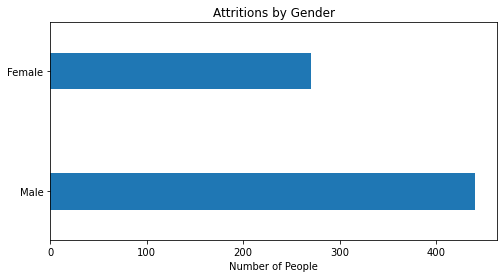

In [17]:
# Attrition by gender
plt.figure(figsize = (8,4))
emp_df[emp_df['Attrition']=='Yes']['Gender'].value_counts().plot(kind = 'barh', width = 0.3)
plt.xticks(rotation = 'horizontal')
plt.xlabel('Number of People')
plt.title('Attritions by Gender')
plt.show()

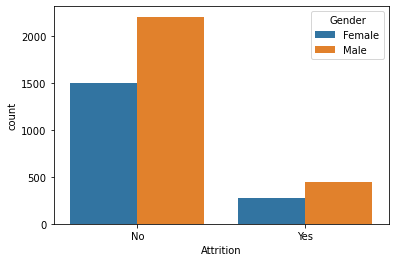

In [18]:
sns.countplot(x='Attrition', hue='Gender', data=emp_df)

In [19]:
gen_count = emp_df['Gender'].value_counts()
gen_per = (gen_count/4410)*100
gen_yes = emp_df[emp_df['Attrition']=='Yes']['Gender'].value_counts()

print('Male Percentage of Observations:', gen_per[0],'%')
print('Female Percentage of Observations:', gen_per[1],'%')
print('--'*20)
print('Male Left Job Percentage:',round((gen_yes[0]/gen_count[0])*100,2), '%')
print('Female Left Job Percentage:',round((gen_yes[1]/gen_count[1])*100,2), '%')

Male Percentage of Observations: 60.0 %
Female Percentage of Observations: 40.0 %
----------------------------------------
Male Left Job Percentage: 16.67 %
Female Left Job Percentage: 15.31 %


Ratio of males and females who left the job is approximately same. We can see here, gender is not an indicator itself.

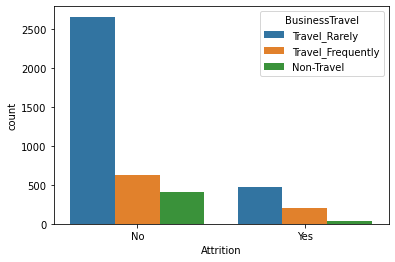

In [21]:
sns.countplot(x='Attrition', hue='BusinessTravel', data=emp_df)

There are three type of travel frequency: Travel_Rarely, Travel_Frequently, Non-Travel

In [22]:
print('Travel Types Percentages:','\n', '--'*20)
print('Travel Rarely per.:', round((3129/4410)*100,2), '%')
print('Travel Frequently per.:', round((831/4410)*100,2), '%')
print('Non Travel per.:', round((450/4410)*100,2), '%\n')

print('Resign Ratios by Travel Frequency:','\n', '--'*20)
print('Travel Rarely per.:', round((468/3129)*100,2), '%')
print('Travel Frequently per.:', round((207/831)*100,2), '%')
print('Non Travel per.:', round((36/450)*100,2), '%\n')

Travel Types Percentages: 
 ----------------------------------------
Travel Rarely per.: 70.95 %
Travel Frequently per.: 18.84 %
Non Travel per.: 10.2 %

Resign Ratios by Travel Frequency: 
 ----------------------------------------
Travel Rarely per.: 14.96 %
Travel Frequently per.: 24.91 %
Non Travel per.: 8.0 %



We can clearly see that the biggest resign ratio belongs to frequently traveling employees.

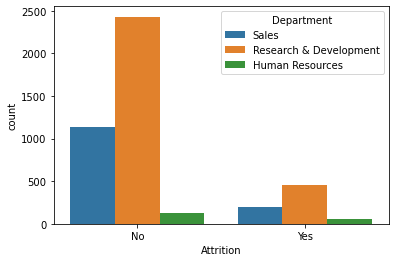

In [29]:
sns.countplot(x='Attrition', hue='Department', data=emp_df)

Human Resource Department has quite higher attrition rate than others

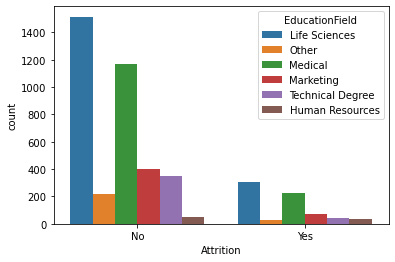

In [26]:
sns.countplot(x='Attrition', hue='EducationField', data=emp_df)

 Human Resource has quite high attrition rate than others

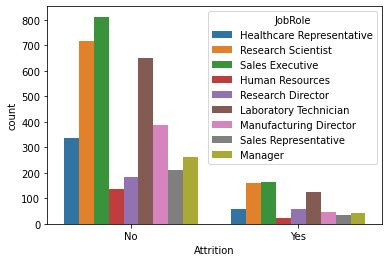

In [27]:
sns.countplot(x='Attrition', hue='JobRole', data=emp_df)

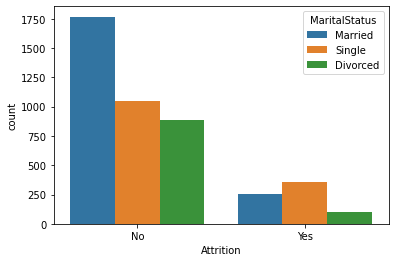

In [28]:
sns.countplot(x='Attrition', hue='MaritalStatus', data=emp_df)

## Numerical Data

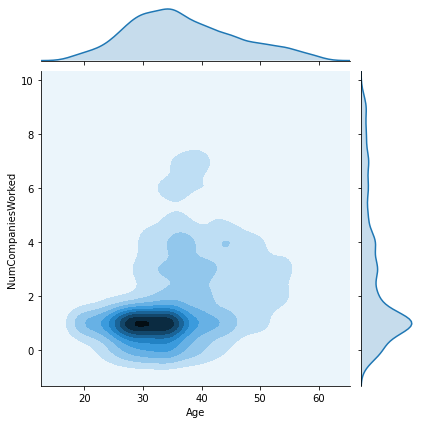

In [30]:
# No of companies worked
sns.jointplot(emp_df['Age'], emp_df['NumCompaniesWorked'], data=emp_df, kind='kde')

Most employees have worked in 1-2 companies, aged between 28-35 (approximately)

In [31]:
num_com_per = (emp_df[emp_df['Attrition']=='Yes']['NumCompaniesWorked'].value_counts()/emp_df.NumCompaniesWorked.value_counts())*100
print('Resign Ratios (%) by Number of Companies Worked\n', '--'*20,'\n',round(num_com_per,2))

Resign Ratios (%) by Number of Companies Worked
 ---------------------------------------- 
 0.0    11.77
1.0    18.83
2.0    10.96
3.0    10.13
4.0    12.05
5.0    24.60
6.0    23.08
7.0    22.97
8.0    12.24
9.0    23.08
Name: NumCompaniesWorked, dtype: float64


We can say that, frequently job changing employees have higher resign ratio

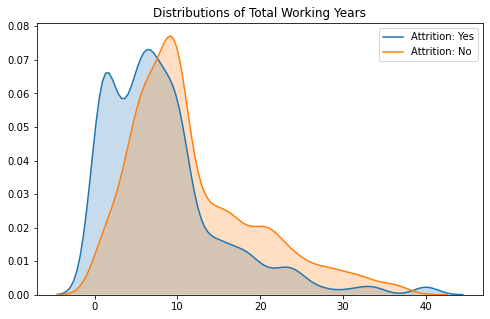

In [32]:
# Total Working Years
work_year_yes = emp_df[emp_df['Attrition']=='Yes']['TotalWorkingYears']
work_year_no = emp_df[emp_df['Attrition']=='No']['TotalWorkingYears']

plt.figure(figsize = (8,5))
sns.kdeplot(data=work_year_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=work_year_no, label="Attrition: No", shade=True)

plt.title("Distributions of Total Working Years")
plt.legend()
plt.show()

The employees with the less total working years are more likely to leave the job.

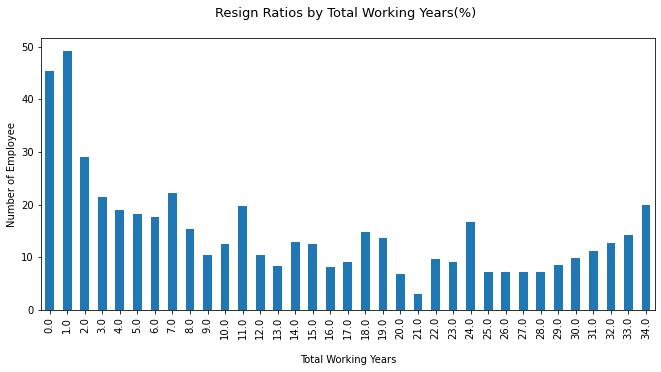

In [33]:
work_year_per = (emp_df[emp_df['Attrition']=='Yes']['TotalWorkingYears'].value_counts()/emp_df.TotalWorkingYears.value_counts())*100
work_year_per = work_year_per[0:34].interpolate()

plt.figure(figsize = (11,5))
work_year_per.plot(kind = 'bar')
plt.xlabel('\nTotal Working Years')
plt.ylabel('Number of Employee')
plt.title('Resign Ratios by Total Working Years(%) \n', size = 13)
plt.show()

What we see here is, more working experienced employees are more stable on their job. But the most important conclusion from here is, unexperienced or less experienced employees are going away probably.

In [34]:
# Average Salaries by Deparment

income_sales = emp_df[emp_df['Department']=='Sales']['MonthlyIncome']
income_RD = emp_df[emp_df['Department']=='Research & Development']['MonthlyIncome']
income_HR = emp_df[emp_df['Department']=='Human Resources']['MonthlyIncome']

print('Sales Dep. Average:',round(income_sales.mean()))
print('R&D Dep. Average:',round(income_RD.mean()))
print('Human Resources Dep. Average:',round(income_HR.mean()))

Sales Dep. Average: 61384
R&D Dep. Average: 67188
Human Resources Dep. Average: 57904


Human Resources Department has lowest average salary.Could be a probable reason for higher attrition in HR department

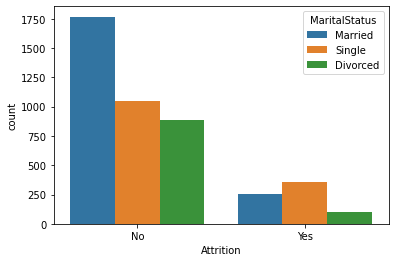

In [35]:
# Marital State

sns.countplot(x='Attrition', hue='MaritalStatus', data=emp_df)

In [36]:
marital_per = (emp_df[emp_df['Attrition']=='Yes']['MaritalStatus'].value_counts()/emp_df.MaritalStatus.value_counts())*100
print('Resign Ratios (%) by Marital Status\n', '=='*20,'\n', round(marital_per,2))

Resign Ratios (%) by Marital Status
 Divorced    10.09
Married     12.48
Single      25.53
Name: MaritalStatus, dtype: float64


Single employees are more likely to leave job than others.

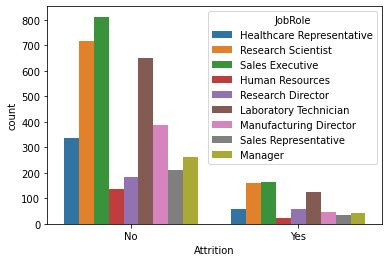

In [37]:
# Job Role
sns.countplot(x='Attrition', hue='JobRole', data=emp_df)

In [38]:
job_role_per = (emp_df[emp_df['Attrition']=='Yes']['JobRole'].value_counts()/emp_df.JobRole.value_counts())*100
print('Resign Ratios (%) by Job Role\n', '=='*20,'\n',round(job_role_per),2)

Resign Ratios (%) by Job Role
 Healthcare Representative    15.0
Human Resources              13.0
Laboratory Technician        16.0
Manager                      14.0
Manufacturing Director       11.0
Research Director            24.0
Research Scientist           18.0
Sales Executive              17.0
Sales Representative         14.0
Name: JobRole, dtype: float64 2


The highest resign ratio here is belonged to research director role followed by Research Scientist

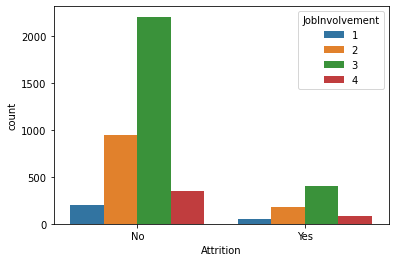

In [39]:
# Job Involvement
sns.countplot(x='Attrition', hue='JobInvolvement', data=emp_df)

Here, we can see that, the third job can not be quitted easily.

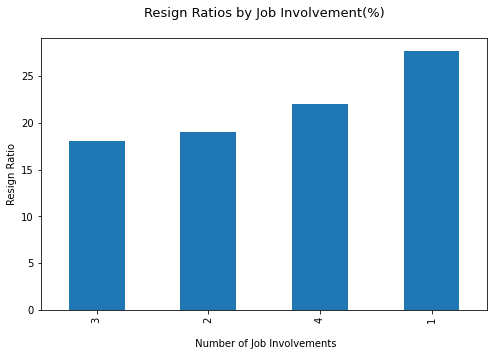

In [40]:
job_yes = emp_df[emp_df['Attrition']=='Yes']['JobInvolvement']
job_no = emp_df[emp_df['Attrition']=='No']['JobInvolvement']

job_per = (job_yes.value_counts()/job_no.value_counts())*100

plt.figure(figsize = (8,5))
job_per.plot(kind = 'bar')
plt.xlabel('\n Number of Job Involvements')
plt.ylabel('Resign Ratio')
plt.title('Resign Ratios by Job Involvement(%)\n', size = 13)
plt.show()

If an employee involves only one job before, he is more likely to leave.

In [41]:
# Environment Satisfaction
df_young = emp_df[(emp_df['Age'] <= 21) & (emp_df['Age'] >= 18)]
df_young_yes = df_young[df_young['Attrition']=='Yes']
df_rest = emp_df[emp_df['Age']>21]

df_young_rd = df_young[df_young['Department']=='Research & Development']
df_young_sale = df_young[df_young['Department']=='Sales']
df_young_hr = df_young[df_young['Department']=='Human Resources']

df_rest_rd = df_rest[df_rest['Department']=='Research & Development']
df_rest_sale = df_rest[df_rest['Department']=='Sales']
df_rest_hr = df_rest[df_rest['Department']=='Human Resources']

print('Young Employee Satisfactions:\n','--'*20)
print('Satisfactions of R&D Dept.:', df_young_rd.JobSatisfaction.mean())
print('Satisfactions of Sales Dept.:', df_young_sale.JobSatisfaction.mean())
print('Satisfactions of HR Dept.:', df_young_hr.JobSatisfaction.mean())
print('Rest of Company Satisfactions:\n','--'*20)
print('Satisfactions of R&D Dept.:', df_rest_rd.JobSatisfaction.mean())
print('Satisfactions of Sales Dept.:', df_rest_sale.JobSatisfaction.mean())
print('Satisfactions of HR Dept.:', df_rest_hr.JobSatisfaction.mean())

Young Employee Satisfactions:
 ----------------------------------------
Satisfactions of R&D Dept.: 2.6666666666666665
Satisfactions of Sales Dept.: 3.1
Satisfactions of HR Dept.: 2.0
Rest of Company Satisfactions:
 ----------------------------------------
Satisfactions of R&D Dept.: 2.7171500179018975
Satisfactions of Sales Dept.: 2.7737003058103977
Satisfactions of HR Dept.: 2.693548387096774


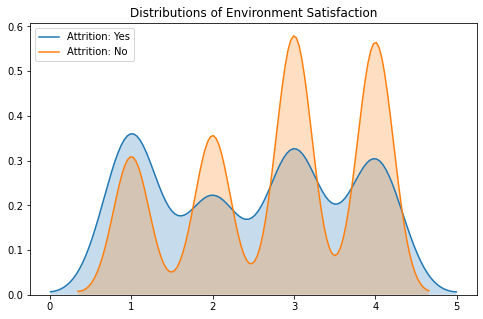

In [42]:
sat_yes = emp_df[emp_df['Attrition']=='Yes']['EnvironmentSatisfaction']
sat_no = emp_df[emp_df['Attrition']=='No']['EnvironmentSatisfaction']

plt.figure(figsize = (8,5))
sns.kdeplot(data=sat_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=sat_no, label="Attrition: No", shade=True)

plt.title("Distributions of Environment Satisfaction")
plt.legend()
plt.show()

In [43]:
sat_per = (sat_yes.value_counts()/sat_no.value_counts())*100

print('Resign Ratio by Environment Satisfaction:\n','=='*20, '\n', round(sat_per,2))

Resign Ratio by Environment Satisfaction:
 1.0    33.70
2.0    17.58
3.0    16.13
4.0    15.50
Name: EnvironmentSatisfaction, dtype: float64


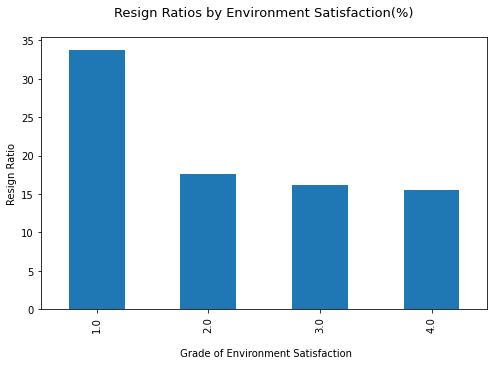

In [44]:
plt.figure(figsize = (8,5))
sat_per.plot(kind = 'bar')
plt.xlabel('\n Grade of Environment Satisfaction')
plt.ylabel('Resign Ratio')
plt.title('Resign Ratios by Environment Satisfaction(%)\n', size = 13)
plt.show()

Employees with low environment satisfaction has significantly higher resign ratio than others. Young employees seem happy to be in sales. Satisfactions are really bad at human resources. Research and development is doing okay, it is close to common situation at company, not bad.

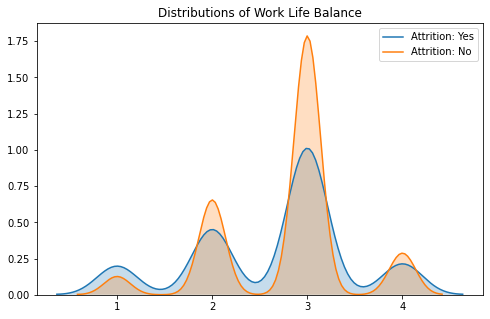

In [45]:
# Work life balance

balance_yes = emp_df[emp_df['Attrition']=='Yes']['WorkLifeBalance']
balance_no = emp_df[emp_df['Attrition']=='No']['WorkLifeBalance']

plt.figure(figsize = (8,5))
sns.kdeplot(data=balance_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=balance_no, label="Attrition: No", shade=True)

plt.title("Distributions of Work Life Balance")
plt.legend()
plt.show()

In [46]:
balance_per = (balance_yes.value_counts()/balance_no.value_counts())*100

print('Resign Ratio by Work Life Balance:\n','=='*20, '\n', round(balance_per,2))

Resign Ratio by Work Life Balance:
 3.0    16.59
2.0    20.17
4.0    21.72
1.0    45.73
Name: WorkLifeBalance, dtype: float64


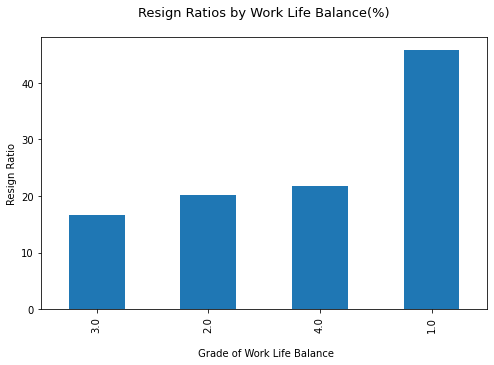

In [47]:
plt.figure(figsize = (8,5))
balance_per.plot(kind = 'bar')
plt.xlabel('\n Grade of Work Life Balance')
plt.ylabel('Resign Ratio')
plt.title('Resign Ratios by Work Life Balance(%)\n', size = 13)
plt.show()

## Correlation of features

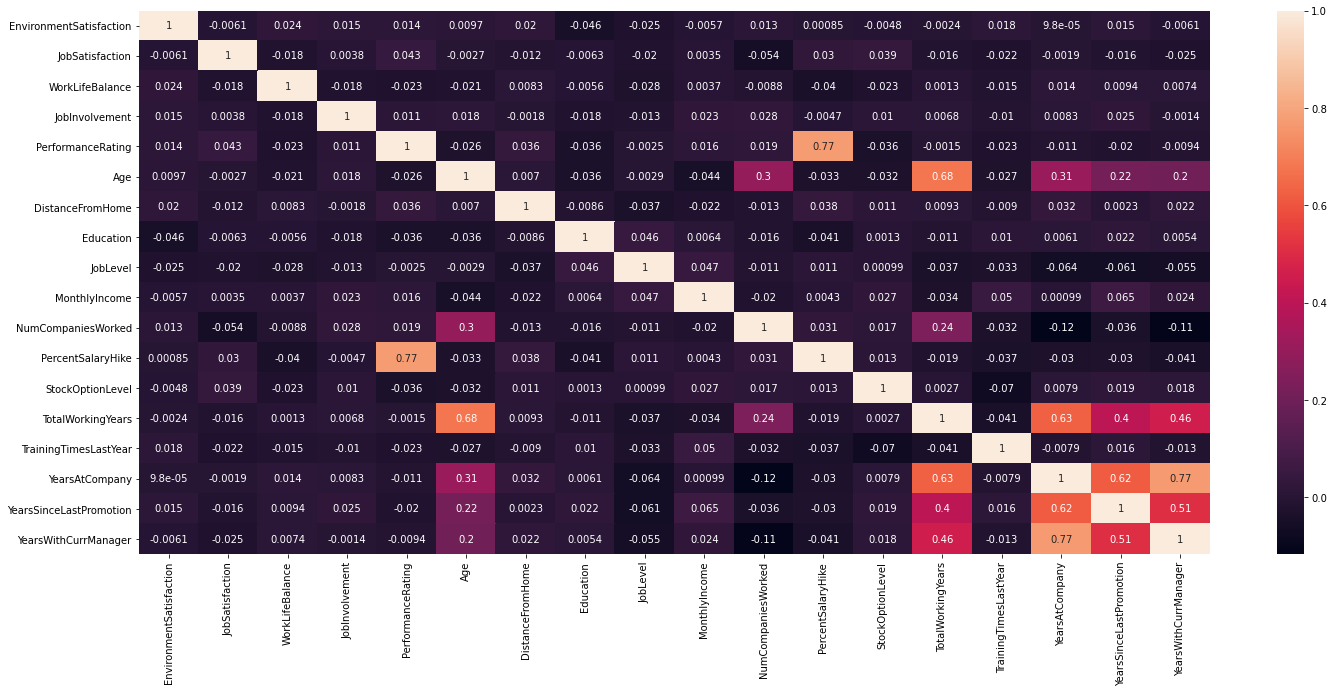

In [48]:
plt.figure(figsize=(24,10))
sns.heatmap(emp_df.corr(), annot=True)

Employees with the lowest work life balance has seriously high probability of resign, about 45 percent.

Initial Conclusions:

1. Job quits rate is 16 percent.
2. Quits rate between genders is balanced.
3. Age distributions between genders are balanced.
4. Resign age distributions between genders are balanced.
5. Majority of company travelling rarely.
6. Resign ratio is seriously high at human resources than others.
7. Resign ratio is not related to education degree primarily.
8. Human resources field educated employees more likely to quit.
9. Research directors have surprisingly high resign ratio.
10. Singles are inclined to quit.
11. Human resources getting low paid.
12. Frequnetly job changing employees inclined to quit.
13. There is no income inequality between genders at company.
14. Employees with little experienced inclined to quit.
15. Employees with low working years at company inclined to quit.
16. Employees on first job are inclined to quit.
17. Employees with low performance rate are inclined to quit.
18. The best performance rate seen between 17-34 ages.
19. Employees with low environmet and job satisfaction are inclined to quit.
20. Employees with low work-life balance are inclined to quit.

## Logistic Regression

In [49]:
df = emp_df.drop('Education', axis = 1)

In [50]:
df.Attrition = pd.get_dummies(df.Attrition, drop_first = True)
df = pd.get_dummies(df)
df.head()

EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  JobInvolvement  \
0                      3.0              4.0              2.0               3   
1                      3.0              2.0              4.0               2   
2                      2.0              2.0              1.0               3   
3                      4.0              4.0              3.0               2   
4                      4.0              1.0              3.0               3   

   PerformanceRating  Age  Attrition  DistanceFromHome  JobLevel  \
0                  3   51          0                 6         1   
1                  4   31          1                10         1   
2                  3   32          0                17         4   
3                  3   38          0                 2         3   
4                  3   32          0                10         1   

   MonthlyIncome  ...  JobRole_Laboratory Technician  JobRole_Manager  \
0         131160  ...                              0                0   
1          41890  ...                              0                0   
2         193280  ...                              0                0   
3          83210  ...                              0                0   
4          23420  ...                              0                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        0   
1                           1                        0   
2                           0                        1   
3                           0                        0   
4                           0                        1   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   MaritalStatus_Married  MaritalStatus_Single  
0                      1                     0  
1                      0                     1  
2                      1                     0  
3                      1                     0  
4                      0                     1  

[5 rows x 44 columns]

In [51]:
balance = (df.Attrition.value_counts()[1]/df.Attrition.shape[0])*100
print('Data Attrition Yes/No Percentage:\n','--'*20,'\n', balance,'%')

Data Attrition Yes/No Percentage:
 ---------------------------------------- 
 16.122448979591837 %


Target variable seems a bit imbalanced. We may have to fix it. Our model recall score should be higher than 0.16.

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Attrition', axis = 1) #feature matrix
y = df.Attrition # target vector

# standard scaled X matrix
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

X_train, X_test, y_train, y_test =  train_test_split(X_std, y, test_size=0.20, random_state=111, stratify = y)

In [56]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# creating grid search with 5 fold
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0)

# fit grid search on data
model = clf.fit(X,y)

# view best parameters 
print('Best Penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.

Best Penalty: l2
Best C: 1.0


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
from sklearn import metrics

model = model.best_estimator_.fit(X_train, y_train)

# predictions for test set
y_preds = model.predict(X_test)

test_accuracy_log = metrics.accuracy_score(y_test, y_preds)
test_recall_log = metrics.recall_score(y_test, y_preds)
print('Test Accuracy:', test_accuracy_log)
print('Test Sensitivity:', test_recall_log)

Test Accuracy: 0.844671201814059
Test Sensitivity: 0.16901408450704225
